<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [2]:
dados = pd.read_csv('Consumo_cerveja.csv', sep = ';')
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Visualizar os dados

In [3]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando o tamanho do dataset

In [4]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_media,365.0,21.226356,3.180108,12.9,19.02,21.38,23.28,28.86
temp_min,365.0,17.461370,2.826185,10.6,15.30,17.90,19.60,24.50
temp_max,365.0,26.611507,4.317366,14.5,23.80,26.90,29.40,36.50
chuva,365.0,5.196712,12.417844,0.0,0.00,0.00,3.20,94.80
fds,365.0,0.284932,0.452001,0.0,0.00,0.00,1.00,1.00
consumo,365.0,25401.367123,4399.142703,14343.0,22008.00,24867.00,28631.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

/tmp/ipykernel_684024/3253774041.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(), annot= True, fmt= '.2f');


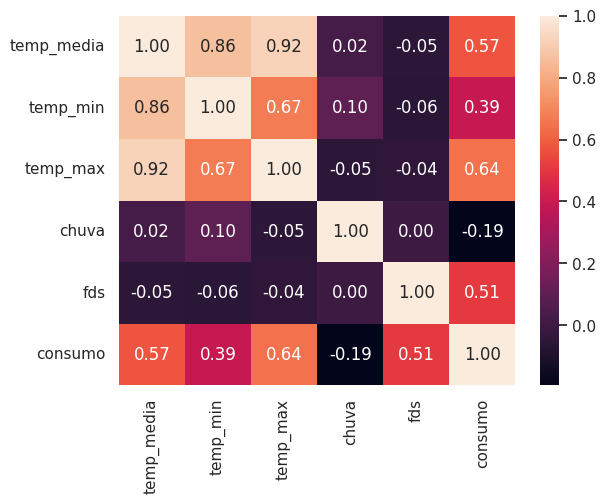

In [6]:
sns.heatmap(dados.corr(), annot= True, fmt= '.2f');

In [7]:
# Mostrando a correlação absoluta das variáveis com o alvo
dados.corr()['consumo'].drop('consumo').sort_values(ascending= False)

/tmp/ipykernel_684024/2334329987.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()['consumo'].drop('consumo').sort_values(ascending= False)


temp_max      0.642672
temp_media    0.574615
fds           0.505981
temp_min      0.392509
chuva        -0.193784
Name: consumo, dtype: float64

In [8]:
# Pegando apenas variáveis que tem baixa correlação entre sim
correl_total = dados.corr(numeric_only= True).abs()

superior = correl_total.where(np.triu(np.ones(correl_total.shape), k =1).astype(np.bool_))

var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]

print(f'Variáveis que tem alta correação: {var_remove}')

Variáveis que tem alta correação: ['temp_min', 'temp_max', 'consumo']


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

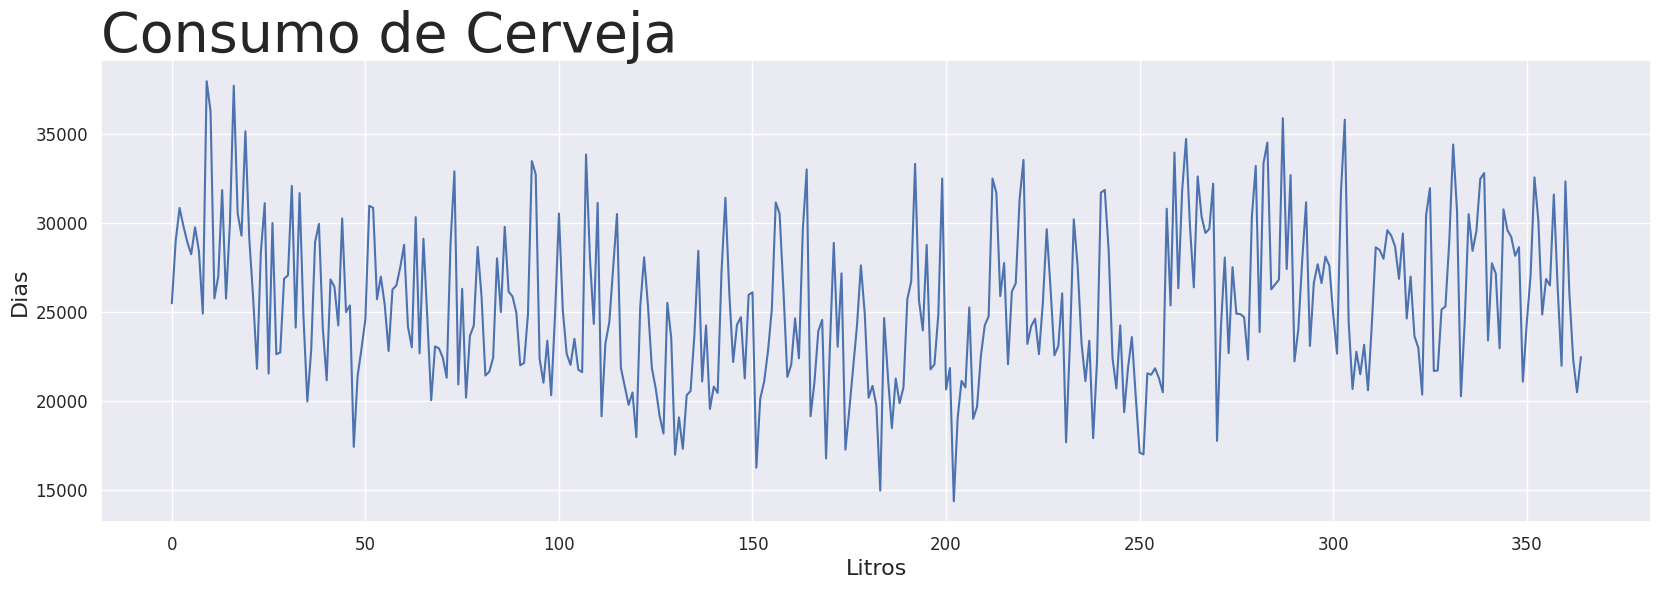

In [9]:
fig, ax = plt.subplots(figsize = (20,6))

ax.set_title('Consumo de Cerveja', fontsize  = 40, loc='left')
ax.set_xlabel('Litros', fontsize = 16)
ax.set_ylabel('Dias', fontsize = 16)
ax = dados['consumo'].plot(fontsize = 12)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

[]

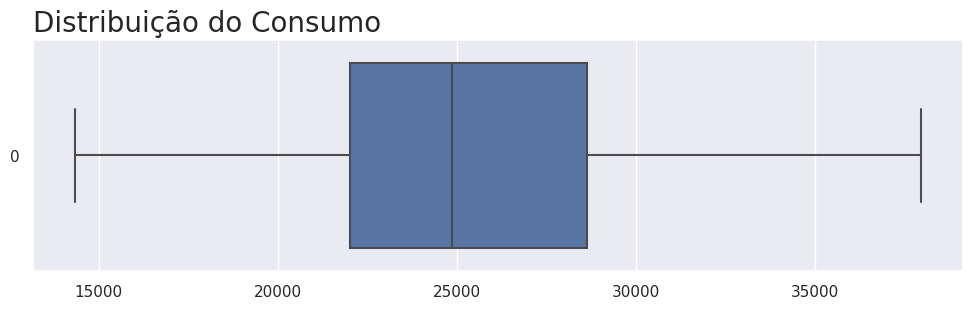

In [10]:
plt.figure(figsize=(12,3))
imagem = sns.boxplot(dados['consumo'], orient= 'h')
imagem.set_title('Distribuição do Consumo', fontsize = 20, loc = 'left')
imagem.plot(fontsize = 30)

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

[]

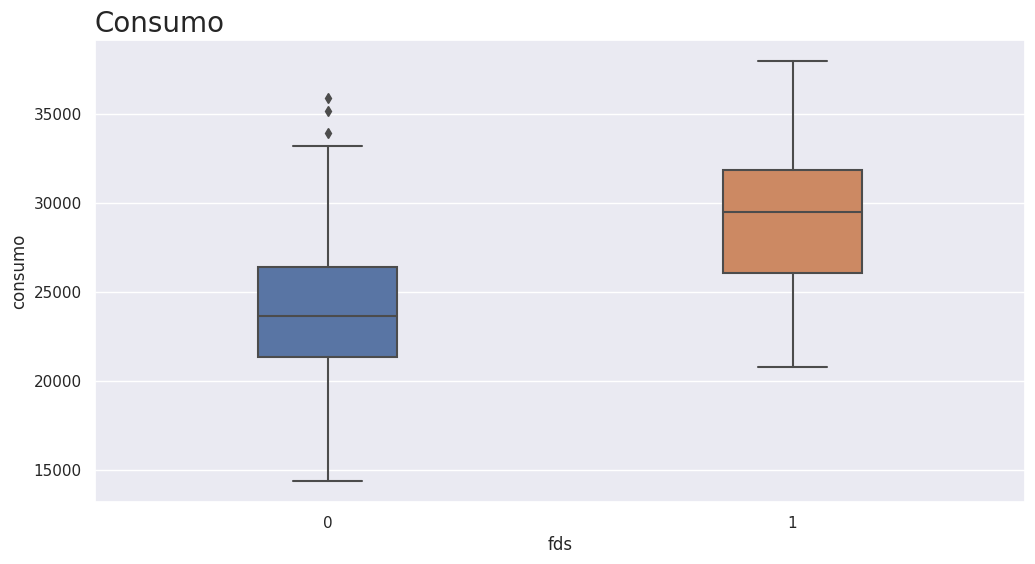

In [11]:
plt.figure(figsize=(12,6))
imagem = sns.boxplot(y='consumo', x='fds', data = dados, orient= 'v', width= 0.3)
imagem.set_title('Consumo', fontsize = 20, loc = 'left')
imagem.plot(fontsize = 30)

In [12]:
dados.columns

Index(['data', 'temp_media', 'temp_min', 'temp_max', 'chuva', 'fds',
       'consumo'],
      dtype='object')

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

Text(0.0, 1.0, 'Consumo de Cerveja')

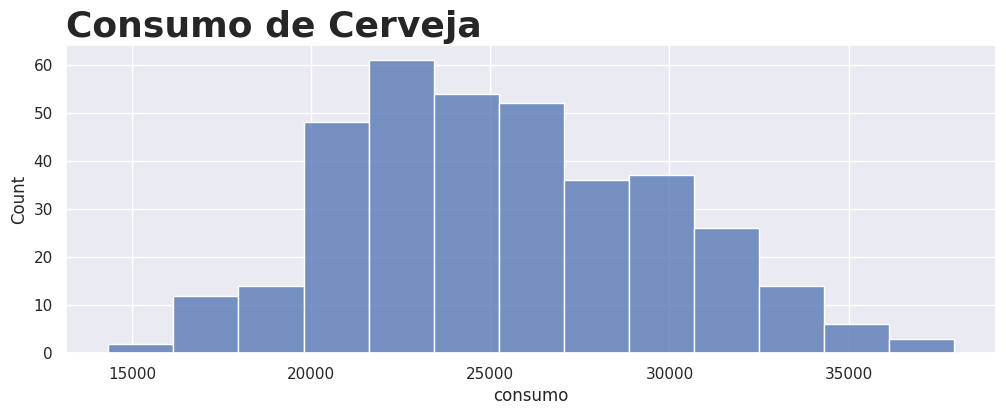

In [13]:

imagem = sns.histplot(dados['consumo'])
imagem.figure.set_size_inches(12,4)
imagem.set_title('Consumo de Cerveja', fontsize = 26, loc = 'left', fontweight = 'bold')

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

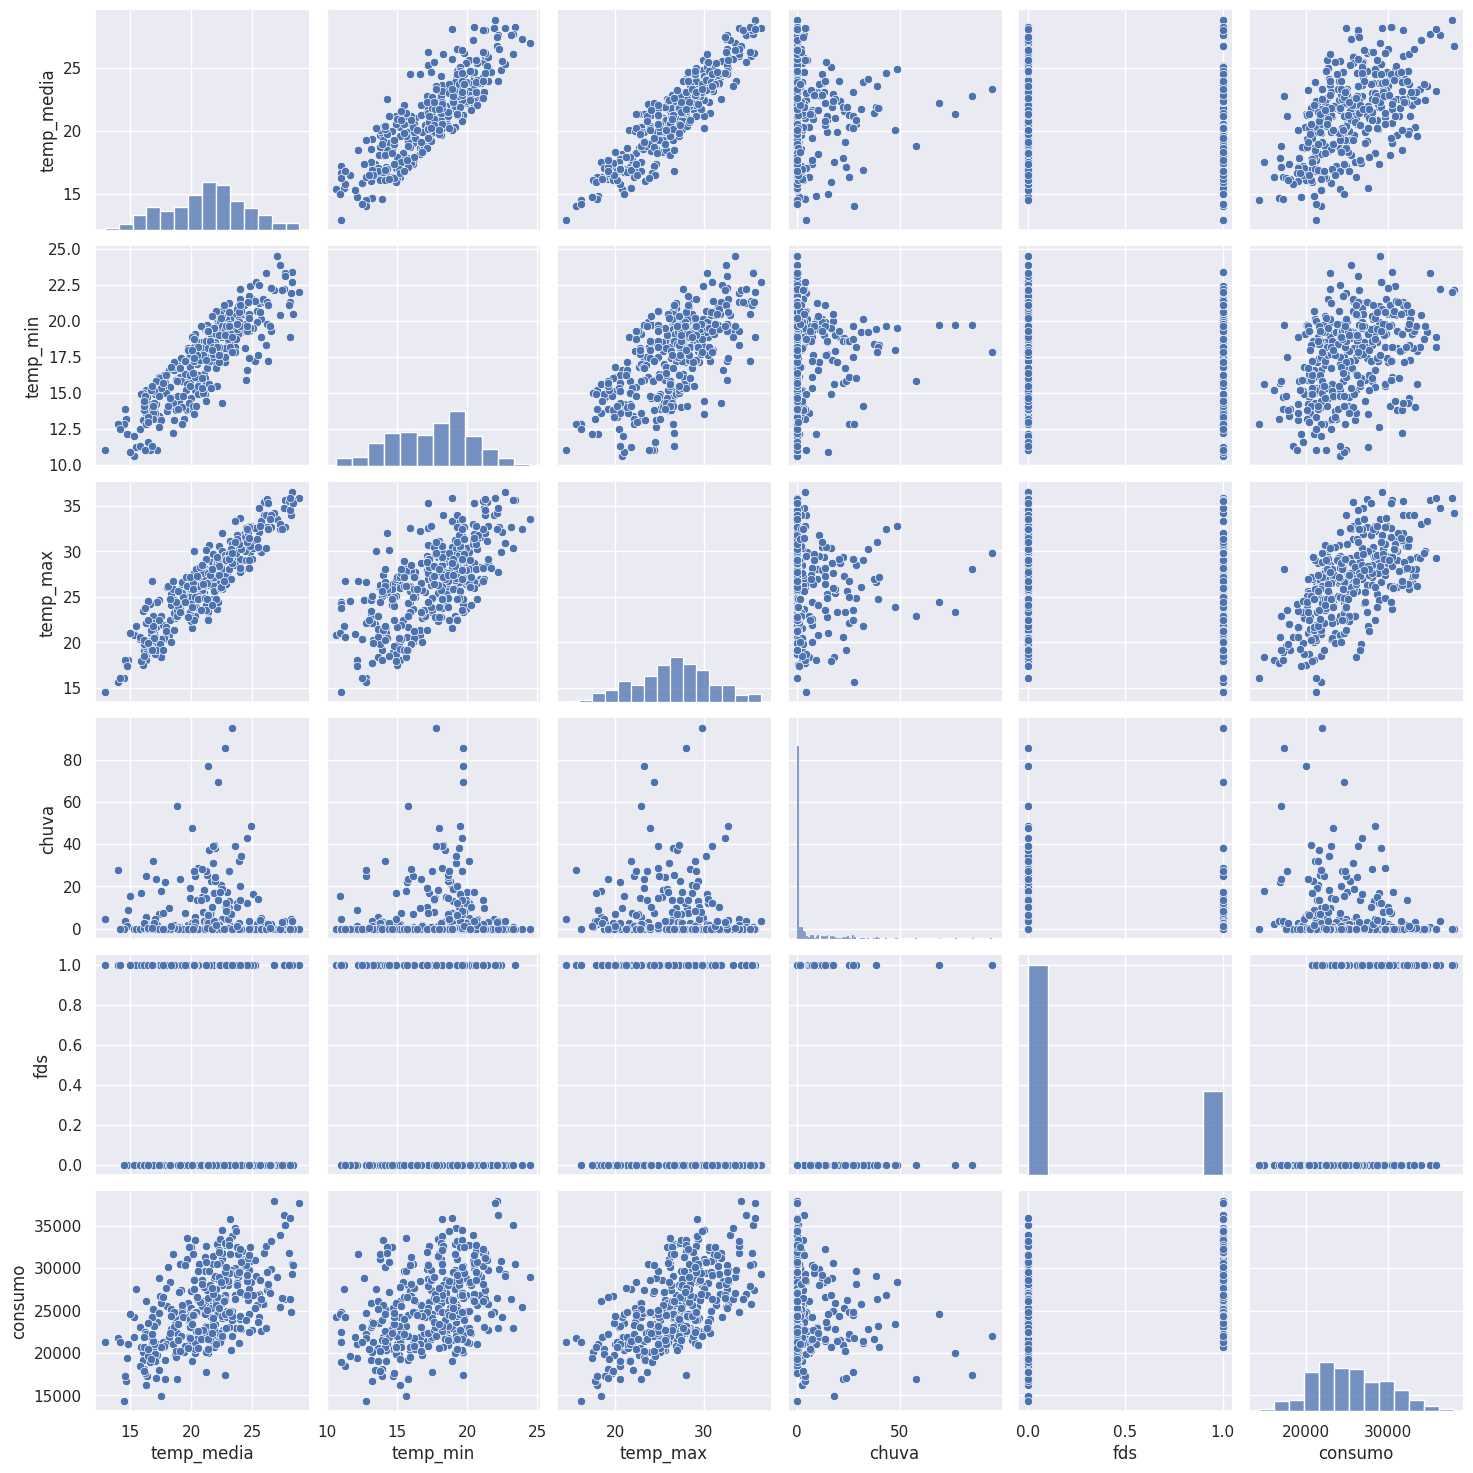

In [14]:
sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

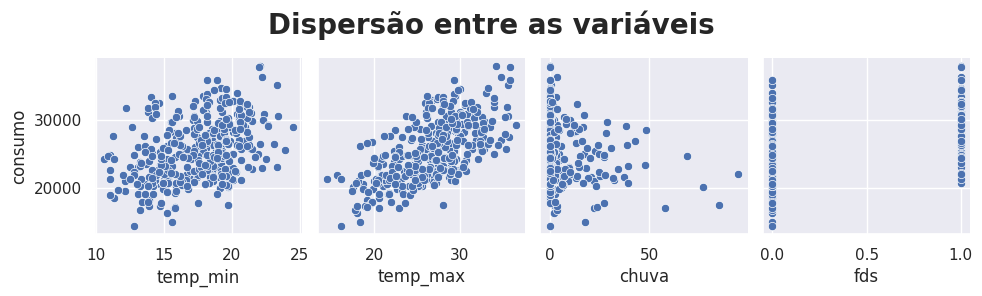

In [15]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars = ['temp_min', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.15, fontweight = 'bold');

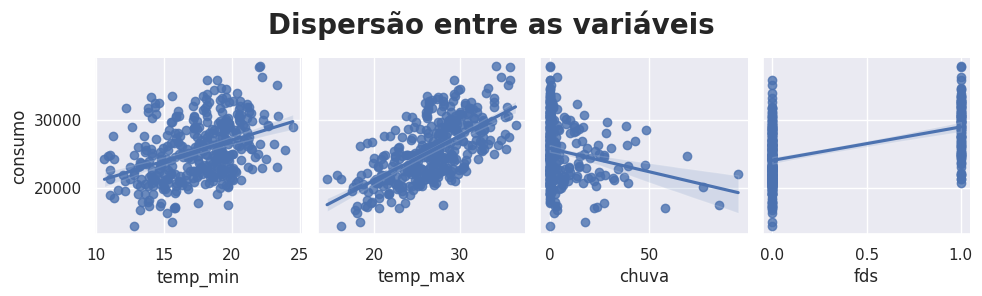

In [16]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars = ['temp_min', 'temp_max', 'chuva', 'fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.15, fontweight = 'bold');

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

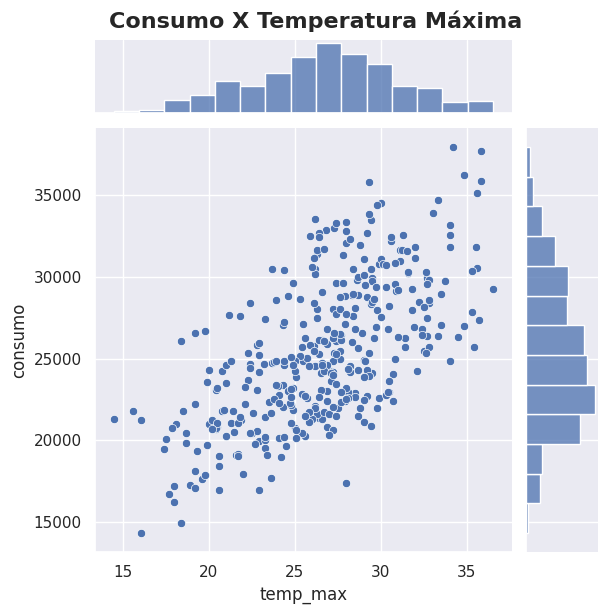

In [17]:

grafico = sns.jointplot(x= 'temp_max', y = 'consumo', data = dados, height= 6)
grafico.fig.suptitle("Consumo X Temperatura Máxima", y=1.02, fontsize = 16, weight = 'bold');


## Plotando um jointplot com a reta de regressão estimada

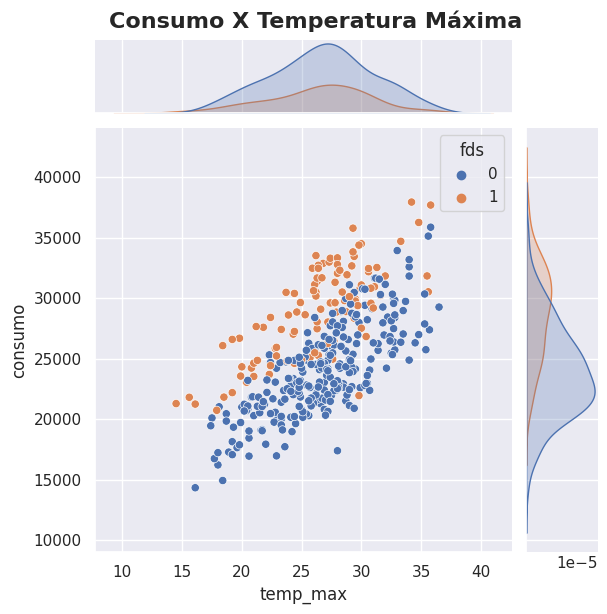

In [18]:
grafico = sns.jointplot(x= 'temp_max', y = 'consumo', data = dados, hue = 'fds')
grafico.fig.suptitle("Consumo X Temperatura Máxima", y=1.02, fontsize = 16, weight = 'bold');

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

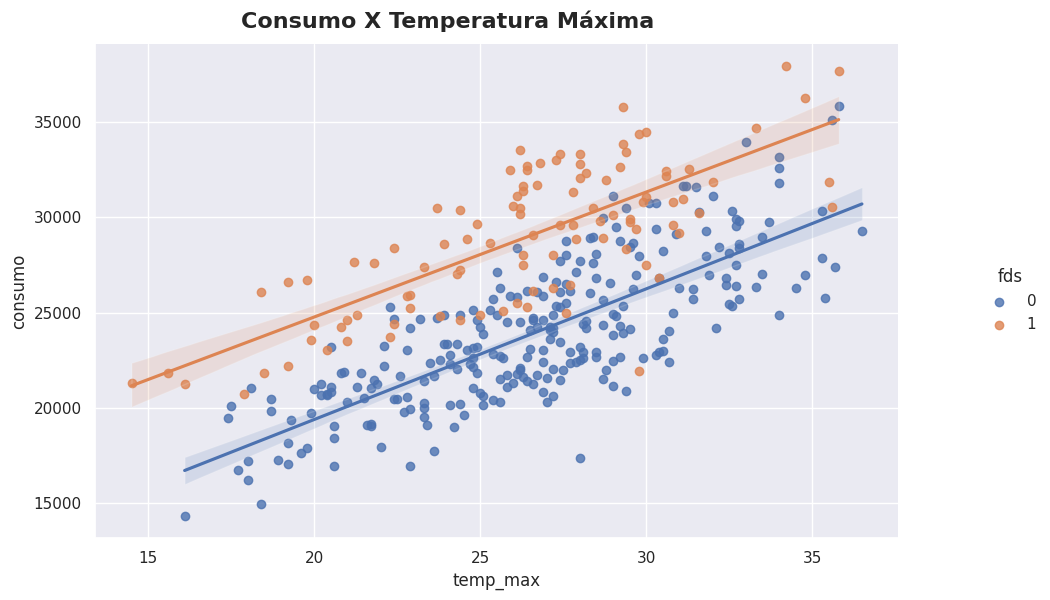

In [19]:

imagem = sns.lmplot(x= 'temp_max', y = 'consumo', data = dados, hue = 'fds')
imagem.fig.suptitle("Consumo X Temperatura Máxima", y=1.02, fontsize = 16, weight = 'bold');
imagem.figure.set_size_inches(12,6)

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

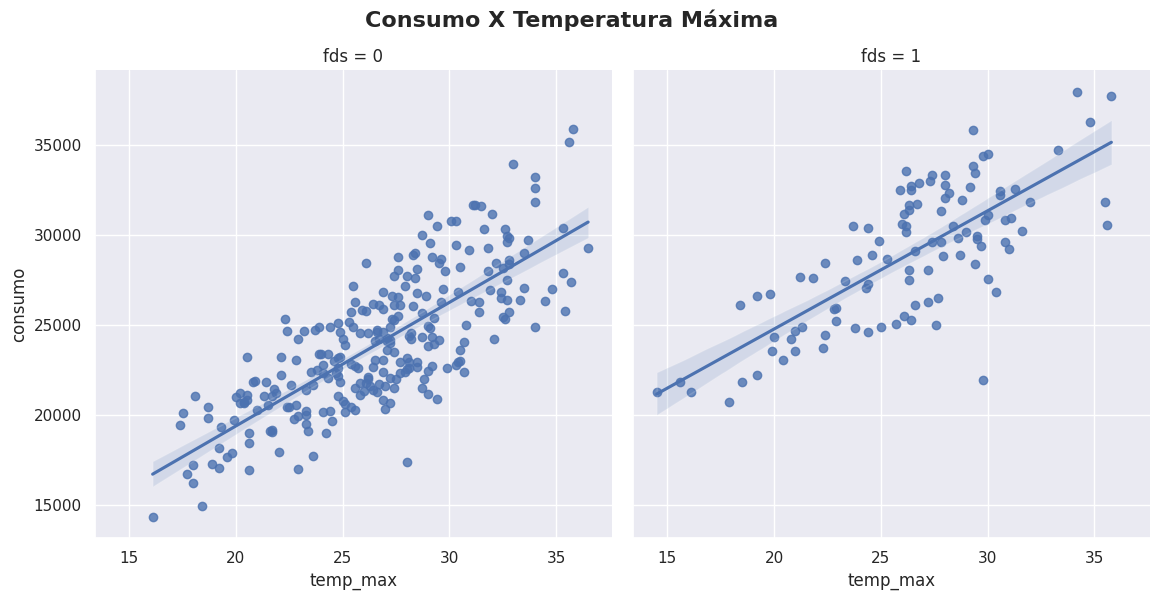

In [20]:
# Basta Muda o hue para col
imagem = sns.lmplot(x= 'temp_max', y = 'consumo', data = dados, col = 'fds')
imagem.fig.suptitle("Consumo X Temperatura Máxima", y=1.02, fontsize = 16, weight = 'bold');
imagem.figure.set_size_inches(12,6)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [22]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [23]:
dados.columns

Index(['data', 'temp_media', 'temp_min', 'temp_max', 'chuva', 'fds',
       'consumo'],
      dtype='object')

In [24]:
# Variáveis preditoras
# Como o R2 ficou muito ruim sem a temperatura máxima, resolvi colocar aqui
var_remove.append('data')
var_remove.remove('temp_max')
var_remove.append('temp_media')
var_remove

['temp_min', 'consumo', 'data', 'temp_media']

In [25]:
# Variável Alvo
x = dados.drop(var_remove, axis = 1)
x.head(3)

,temp_max,chuva,fds
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1


## Criando os datasets de treino e de teste

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 42)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [27]:
x_train.shape, y_train.shape

((255, 3), (255,))

In [28]:
x_test.shape, y_test.shape

((110, 3), (110,))

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, r2_score, mean_squared_error

## Instanciando a classe *LinearRegression()*

In [30]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [31]:
modelo.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [32]:
print(f'R² {round(modelo.score(x_train, y_train),2)}')

R² 0.71


In [33]:
coefientes = pd.DataFrame({'Variaveis': x.columns, 'Coeficientes': modelo.coef_})
coefientes

,Variaveis,Coeficientes
0,temp_max,667.524992
1,chuva,-53.057181
2,fds,5334.971843


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [34]:
# Fazendo as previsões do Modelo
previsoes = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [35]:
print(f'R² {round(r2_score(y_test, previsoes),2)}')

R² 0.75


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [36]:
# Pegando de um dado de entrada de forma aleatória
entrada = x_test.sample(1)
entrada

,temp_max,chuva,fds
116,24.9,0.0,0


## Gerando previsão pontual

In [37]:
# Previsão gerada pelo meu modelo
previsao = modelo.predict(entrada)[0]
previsao

23017.546529530708

In [38]:
# Verificando qual foi o valor real
real = dados[dados.index == 196]['consumo'].values[0]
real

21748

In [39]:
# Verificando a diferença entre o que o modelo calculou e o resultado real
round(previsao - real,2)

1269.55

## Criando um simulador simples

In [40]:
x_test.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [41]:
modelo.intercept_

6396.1742286972585

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [42]:
x_train.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [43]:
modelo.intercept_

6396.1742286972585

In [44]:
modelo.coef_

array([ 667.524992  ,  -53.05718063, 5334.97184259])

In [45]:
coefientes = pd.DataFrame({'Variaveis': x.columns, 'Coeficientes': modelo.coef_})
coefientes

,Variaveis,Coeficientes
0,temp_max,667.524992
1,chuva,-53.057181
2,fds,5334.971843


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>6396,52 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>667,54 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-53,057 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5334,98 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [46]:
previsoes_y = modelo.predict(x_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

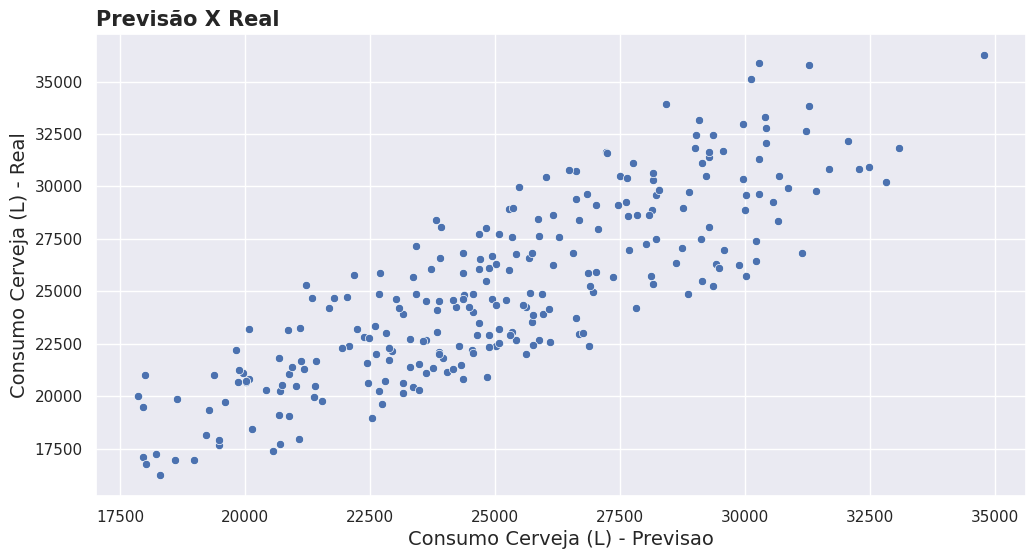

In [47]:
ax = sns.scatterplot(x = previsoes_y, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize = 15, weight = 'bold', loc = 'left')
ax.set_xlabel('Consumo Cerveja (L) - Previsao', fontsize = 14)
ax.set_ylabel('Consumo Cerveja (L) - Real', fontsize = 14);

## Obtendo os resíduos

In [48]:
# Basta subtrair os dados de treino do Previsto
residuo = y_train - previsoes_y

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

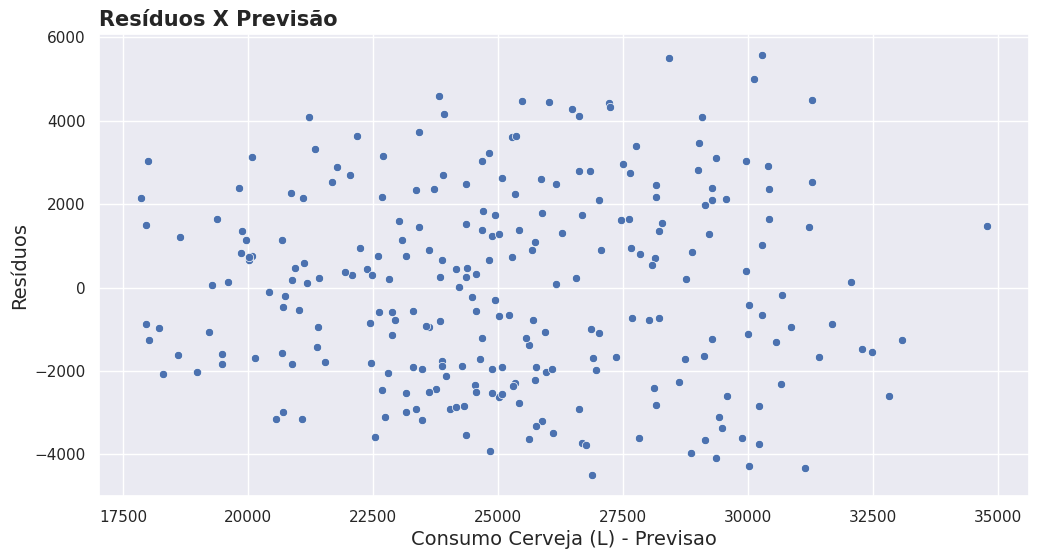

In [49]:
ax = sns.scatterplot(x = previsoes_y, y = residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos X Previsão', fontsize = 15, weight = 'bold', loc = 'left')
ax.set_xlabel('Consumo Cerveja (L) - Previsao', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize = 14);

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

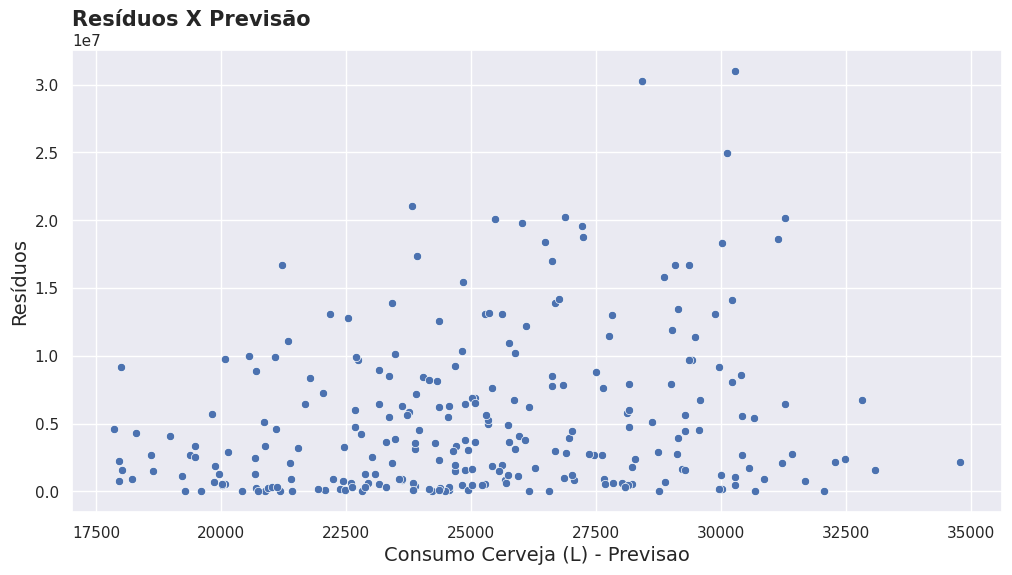

In [50]:
ax = sns.scatterplot(x = previsoes_y, y = residuo **2)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos X Previsão', fontsize = 15, weight = 'bold', loc = 'left')
ax.set_xlabel('Consumo Cerveja (L) - Previsao', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize = 14);

## Plotando a distribuição de frequências dos resíduos

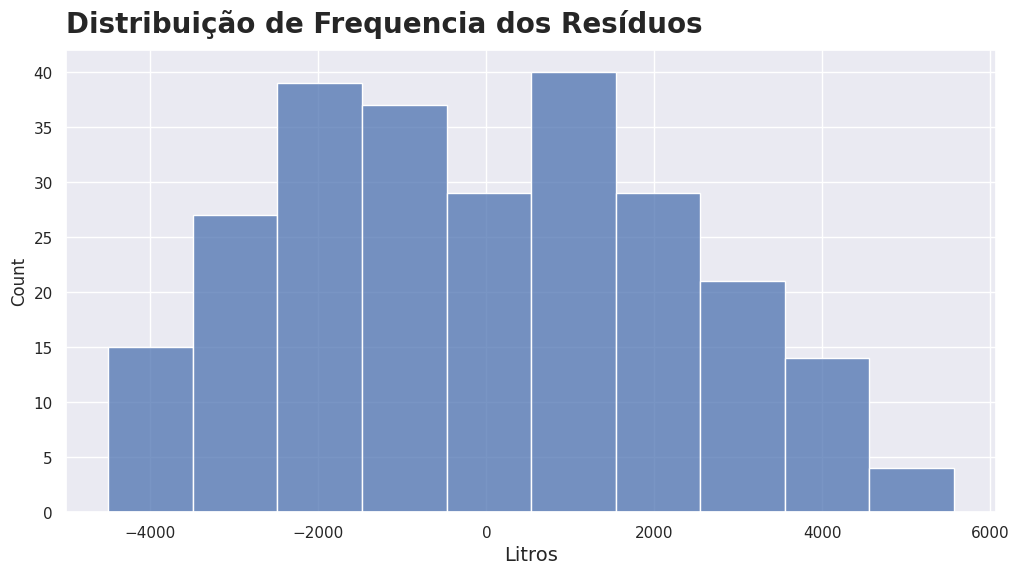

In [51]:
# ax = sns.displot(residuo)
ax = sns.histplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequencia dos Resíduos', 
            weight = 'bold', fontsize = 20, loc = 'left', y =1.02)
ax.set_xlabel('Litros', fontsize = 14);

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [52]:
# A idea é testar o modelo com outras variáveis independentes entre si e comparar a performance com o anterior
x2 = dados[['temp_media', 'chuva', 'fds']]

In [53]:
x2.shape

(365, 3)

## Criando os datasets de treino e de teste

In [54]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size= .3, random_state= 2811)

## Instanciando a classe *LinearRegression()*

In [55]:
modelo2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [56]:
modelo2.fit(x2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [57]:
print('Modelo com Feature - Temperatura Média')
print(f'R² {round(modelo2.score(x2_train, y2_train ),2)}')

Modelo com Feature - Temperatura Média
R² 0.66


In [58]:
print('Modelo com Feature - Temperatura Máxima')
print(f'R² {round(modelo.score(x_train, y_train),2)}')

Modelo com Feature - Temperatura Máxima
R² 0.71


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [81]:
y_previsto = modelo.predict(x_test)
y2_previsto = modelo2.predict(x2_test)

In [76]:
y_test.shape, y_previsto.shape

((110,), (110,))

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [85]:
print('Modelo com Feature - Temperatura Média')
print(f'R² {round(r2_score(y_test, y_previsto),2)}')

Modelo com Feature - Temperatura Média
R² 0.75


In [86]:
print('Modelo com Feature - Temperatura Média')
print(f'R² {round(r2_score(y2_test, y2_previsto),2)}')

Modelo com Feature - Temperatura Média
R² 0.66


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [98]:
# Erro médio Quadrado
EQM_2 = mean_squared_error(y2_test, y2_previsto).round(2)

# Erro médio
REQM_2 = np.sqrt(mean_squared_error(y2_test, y2_previsto).round(2))

# R quadrado do Modelo
R2_2 = r2_score(y2_test, y2_previsto)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM_2', 'REQM_2', 'R2_2'], columns=['Métricas'])

,Métricas
EQM_2,6.060775e+06
REQM_2,2.461864e+03
R2_2,6.574589e-01


## Obtendo métricas para o modelo com Temperatura Máxima

In [91]:
# Erro médio Quadrado
EQM = mean_squared_error(y_test, y_previsto).round(2)

# Erro médio
REQM = np.sqrt(mean_squared_error(y_test, y_previsto).round(2))

# R quadrado do Modelo
R2 = r2_score(y_test, y_previsto)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R2'], columns=['Métricas'])

,Métricas
EQM,5.480853e+06
REQM,2.341122e+03
R2,7.487244e-01


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [99]:
x_test[0:1]

,temp_max,chuva,fds
193,28.7,0.0,0


In [100]:
entrada = x_test[0:1]

## Gerando previsão pontual

In [101]:
modelo.predict(entrada)

array([25554.14149914])

## Criando um simulador simples

## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [102]:
import pickle

In [103]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

In [105]:
# Rodando o modelo que acabei de Salvar na máquina
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))

26108.39 litros


/home/evaldoj/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```